# Assignment 2
___________________________________________________________________________________________________________________________

 
 ### _Data analysis with pandas_
 ===========================================================================================================================
 
 *In this task you should use Pandas to answer a few questions about the adult dataset given in the folder.*
 
 Unique values of all features:
   * `age`: continuous.
   
   * `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
   
   * `fnlwgt`: continuous.
   
   * `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
   
   * `education-num`: continuous.
   
   * `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
   
   * `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
   
   * `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
   
   * `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
   
   * `sex`: Female, Male.
   
   * `capital-gain`: continuous.
   
   * `capital-loss`: continuous.
   
   * `hours-per-week`: continuous.
   
   * `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
   
   * `salary`: >50K,<=50K

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('adult_data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. How many men and women are represented in this dataset?

In [3]:
male_count=len(data[data['sex']=='Male'])
female_count=len(data[data['sex']=='Female'])
print('Number of Male=',male_count,'Number of Female=',female_count)

Number of Male= 21790 Number of Female= 10771


### 2. What is the average age of women?

In [4]:
women=data[data.sex=='Female']
women['age'].mean()

36.85823043357163

### 3. What is the percentage of german citizens?

In [5]:
germans_count=len(data[data['native-country']=='Germany'])
germans_per=((germans_count)/(male_count+female_count))*100
print(germans_per)

0.42074874850281013


### 4. What is the mean of age for those who earn more than 50K per year and those who earn less than 50K per year? 

In [6]:
more_than=data[data.salary=='>50K']['age']
less_than=data[data.salary=='<=50K']['age']
print('mean of age for those who earn more than 50K per year :',more_than.mean(),'mean of age for those who earn less than 50K per year :',less_than.mean())

mean of age for those who earn more than 50K per year : 44.24984058155847 mean of age for those who earn less than 50K per year : 36.78373786407767


### 5. What is the standard deviation of age for those who earn more than 50K per year and those who earn less than 50K per year? 

In [7]:
print('Standard Deviation of age for those who earn more than 50K per year:')
print(more_than.std(),'\n')
print('Standard Deviation of age for those who earn less than 50K per year:')
print(less_than.std())

Standard Deviation of age for those who earn more than 50K per year:
10.519027719851826 

Standard Deviation of age for those who earn less than 50K per year:
14.02008849082488


### 6. Is it true that people who earn more than 50K have at least high school education?

In [8]:
richppl=data[data.salary=='>50K']
edu_lessthan=len(richppl[richppl['education-num']<9])
if edu_lessthan >0 :
    print("False")
else:
    print('True')

False


### 7. Display age statistics for each race and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [9]:
race_group=data.groupby(['race'])
gender_group=data.groupby(['sex'])
men=gender_group.get_group('Male')
race_group_of_men=men.groupby('race')
rd=race_group['age'].describe()
gd=gender_group['age'].describe()
print('Age statistics for each race')
print(rd)
print('\n\nAge statistics for each gender')
print(gd)
AIE=race_group_of_men.get_group('Amer-Indian-Eskimo')
print('\n\nMaximum age of men of Amer-Indian-Eskimo race is',AIE['age'].max())

Age statistics for each race
                      count       mean        std   min   25%   50%   75%  \
race                                                                        
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                     max  
race                      
Amer-Indian-Eskimo  82.0  
Asian-Pac-Islander  90.0  
Black               90.0  
Other               77.0  
White               90.0  


Age statistics for each gender
          count       mean        std   min   25%   50%   75%   max
sex                                                                
Female  10771.0  36.858230  14.013697  17.0  25.0  35.0  46.0  90.0
Male 

### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [11]:
allmen=data[data.sex=='Male']
allmen_grouped=allmen.groupby('marital-status')
MCS=allmen_grouped.get_group('Married-civ-spouse')
MSA=allmen_grouped.get_group('Married-spouse-absent')
MAS=allmen_grouped.get_group('Married-AF-spouse')
dict_of_rich={}
dict_of_rich[1]=len(MCS[MCS.salary=='>50K'])
dict_of_rich[2]=len(MSA[MSA.salary=='>50K'])
dict_of_rich[3]=len(MAS[MAS.salary=='>50K'])
rich_married_men=0
for i in dict_of_rich:
    rich_married_men=dict_of_rich[i]+rich_married_men
all_rich_men=len(allmen[allmen.salary=='>50K'])
rich_bachelor_men=all_rich_men-rich_married_men
if (rich_bachelor_men>rich_married_men):
                 print('Bachelor Men')
else:
                 print('Married Men')


Married Men


### 9. What is the maximum number of hours a person works per week? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [12]:
max_hrs=data['hours-per-week'].max()
maxhrs_ppl=len(data[data['hours-per-week']==max_hrs])
rich_worklot=data[data['hours-per-week']==max_hrs]
rich_worklot=len(rich_worklot[rich_worklot.salary=='>50K'])
print('Max number of hours a person works per week :',max_hrs)
print('People who work max hours :',maxhrs_ppl)
print('People who work max hours and earn >50K :',rich_worklot)
print('Percentage of people who work max hours and are rich :',(rich_worklot/maxhrs_ppl)*100)

Max number of hours a person works per week : 99
People who work max hours : 85
People who work max hours and earn >50K : 25
Percentage of people who work max hours and are rich : 29.411764705882355


### 10. Count the average time of work for those who earn a little and a lot for each country. What will these be for Japan?

In [13]:
rich_ppl=data[data.salary=='>50K']
poor_ppl=data[data.salary=='<=50K']
rich_group=rich_ppl.groupby(['native-country'])
poor_group=poor_ppl.groupby(['native-country'])
print('Average time of work for those who earn >50K in hours per week')
print(rich_group['hours-per-week'].mean())
print('\n\n\nAverage time of work for those who earn <=50K in hours per week')
print(poor_group['hours-per-week'].mean())

Average time of work for those who earn >50K in hours per week
native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.0

In [14]:
poor_jap=poor_group.get_group('Japan')
rich_jap=rich_group.get_group('Japan')
print('Hours per week of Japanese who earn >50K:',rich_jap['hours-per-week'].mean())
print('Hours per week of Japanese who earn <=50K:',poor_jap['hours-per-week'].mean())

Hours per week of Japanese who earn >50K: 47.958333333333336
Hours per week of Japanese who earn <=50K: 41.0


Bar graph of people who earn less than 50K


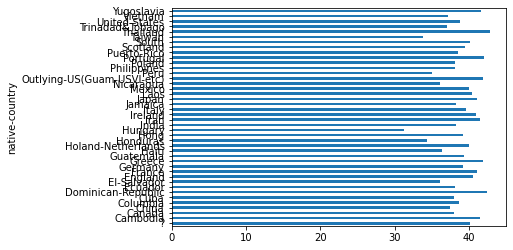

In [15]:
Mean_poor=poor_group['hours-per-week'].mean()
print('Bar graph of people who earn less than 50K')
Mean_poor.plot.barh()

Bar graph of people who earn more than 50K


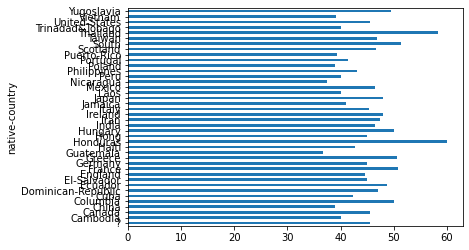

In [16]:
Mean_rich=rich_group['hours-per-week'].mean()
print('Bar graph of people who earn more than 50K')
Mean_rich.plot.barh()